# package imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data import 

In [2]:
df_initial = pd.read_csv(r"C:\Users\garde\Desktop\Github\data\data.csv",
                 encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

#dropping duplicates
df_initial.drop_duplicates(inplace = True)

#dropping canceled
df = df_initial[~df_initial.InvoiceNo.str.contains('C')]

# Converting the invoice date column to time object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()

C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 2 - EDA

### 2.1 -  Sales by countries

Text(0, 0.5, 'Total Income (£)')

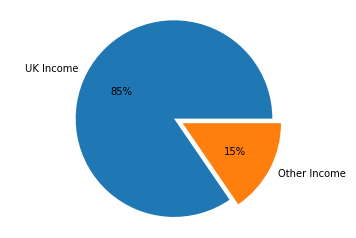

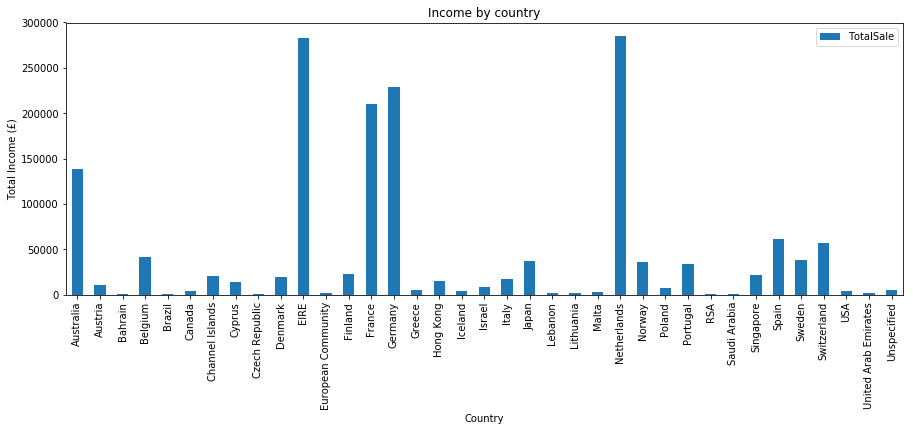

In [3]:
#adding a total sales column to group quantity and unit price

TotalSale = df['Quantity'] * df['UnitPrice']
df.insert(loc = 8, column = "TotalSale", value = TotalSale)

#pie chart - income repartition
sizes = [df.loc[df['Country'] == "United Kingdom", 'TotalSale'].sum(),
             df.loc[df['Country'] != "United Kingdom", 'TotalSale'].sum()]
labels = "UK Income", "Other Income"
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.0f%%')
ax1.axis("equal")

#graph construction - UK (seperate for scale)
df_country = df.groupby(["Country"]).sum()
df_country.drop("United Kingdom", inplace = True)
df_country.drop(["UnitPrice", "Quantity"], axis = 1, inplace = True)

df_country.plot(kind = "bar", figsize = (15, 5), title = "Income by country")
plt.xlabel("Country")
plt.ylabel("Total Income (£)")


IN WRITING:
 - UK has most of the sales as it is based there
 - looking at other countries we see eire, netherland, france and germany ahead
 - can be explained by economical power and proximity
 - info can be useful for business decision such as marketing, delivery, etc

### 2.2 - Sales over Time

C:\Users\garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


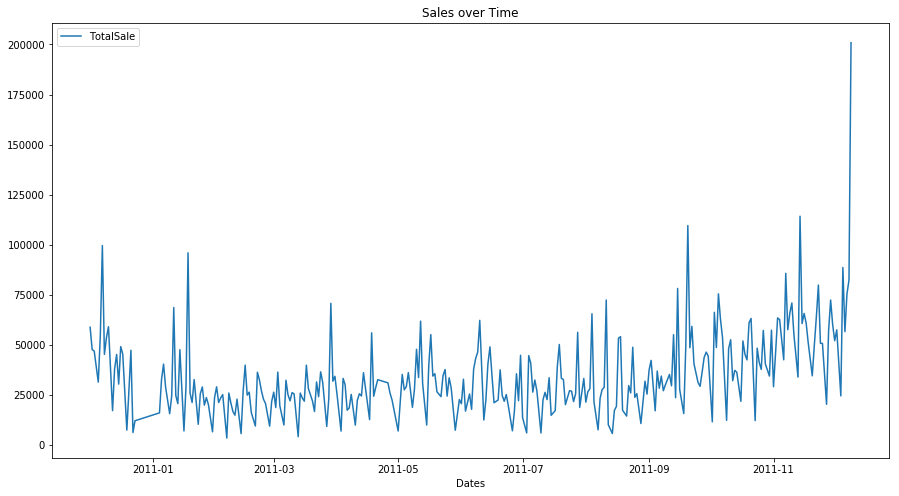

In [4]:
#Data preprocessing 
df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date

#Ploting
df_sales_over_time = df.groupby(["Dates"]).sum()
df_sales_over_time.drop(["Quantity", "UnitPrice"], axis=1, inplace = True)
df_sales_over_time.plot(figsize = (15,8), title = "Sales over Time")

IN WRITING
- clearly see that sells are up before and around christmas holidays
- talk about business strat consequences (ie marketing etc )

### 2.3 - Biggest & Smallest Customers

The biggest customers the company has are :
             Quantity  UnitPrice  TotalSale
CustomerID                                
14646         197491    5176.09  280206.02
18102          64124    1940.92  259657.30
17450          69973    1135.32  194390.79
16446          80997       4.98  168472.50
14911          80490   26150.35  143711.17 

The smallest customers the company has are :
             Quantity  UnitPrice  TotalSale
CustomerID                                
16878             12       4.75      13.30
17956              1      12.75      12.75
16454              3       3.95       6.90
14792              2       6.20       6.20
16738              3       1.25       3.75


C:\Users\garde\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5, 1.0, 'Cumulative Sales per Customer')

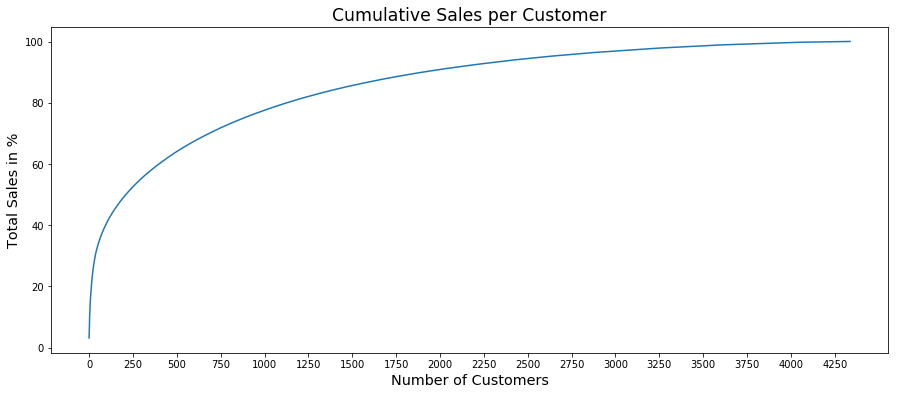

In [5]:
# Data prepocessing
df_customerID = df.groupby(["CustomerID"]).sum()
df_customerID.sort_values("TotalSale", ascending = False, inplace = True)
df_customerID_final = df_customerID[(df_customerID["Quantity"] > 0) & (df_customerID["TotalSale"] > 0)]

#Tables
print("The biggest customers the company has are :\n",
      df_customerID_final.head(),
      "\n\nThe smallest customers the company has are :\n",
      df_customerID_final.tail())

#bar chart
df_customerID_final.drop(["Quantity", "UnitPrice"], axis = 1, inplace= True)
df_percent = (100. * df_customerID_final / df_customerID_final.sum()).round(3)
df_cum_percent = df_percent.cumsum()
df_cum_percent['counter'] = range(len(df_cum_percent))

plt.figure(figsize=(15, 6))
plt.plot(df_cum_percent["counter"], df_cum_percent["TotalSale"])

plt.xlabel("Number of Customers", fontsize="x-large")
plt.ylabel("Total Sales in %", fontsize="x-large")
plt.xticks(np.arange(0, 4500, 250))
plt.title("Cumulative Sales per Customer", fontsize="xx-large")

IN WRITING:
-always useful for cust relationship etc

### 2.3 - Best/worst Selling Products in Terms of Quantity & Revenue

In [6]:
# Data prepocessing
df_description = df.groupby(["Description"]).sum()

#Quantity
df_description.sort_values("Quantity", ascending = False, inplace = True)
df_description_final = df_description[(df_description["Quantity"] > 0) & (df_description["TotalSale"] > 0)]
print("The best seller products the company offers are :\n",
      df_description_final.head(),
      "\n\nThe worst seller products the company offers are :\n",
      df_description_final.tail())

#Revenue
df_description.sort_values("TotalSale", ascending = False, inplace = True)
df_description_final = df_description[(df_description["Quantity"] > 0) & (df_description["TotalSale"] > 0)]
print("\nThe most profitable products the company offers are :\n",
      df_description_final.head(),
      "\n\nThe least profitable products the company offers are :\n",
      df_description_final.tail())

The best seller products the company offers are :
                                     Quantity  UnitPrice  TotalSale
Description                                                       
PAPER CRAFT , LITTLE BIRDIE            80995       2.08  168469.60
MEDIUM CERAMIC TOP STORAGE JAR         78033     367.12   81700.92
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54951     171.91   13814.01
JUMBO BAG RED RETROSPOT                48375    5243.39   94159.81
WHITE HANGING HEART T-LIGHT HOLDER     37876    7437.57  106236.72 

The worst seller products the company offers are :
                                     Quantity  UnitPrice  TotalSale
Description                                                       
FRYING PAN RED POLKADOT                    1       4.25       4.25
MUMMY MOUSE RED GINGHAM RIBBON             1       5.45       5.45
BLUE CRYSTAL BOOT PHONE CHARM              1       1.66       1.66
ORANGE FELT VASE + FLOWERS                 1       1.25       1.25
BAROQUE BUTTERFLY EARRIN

IN WRITING:
-useful for good supply chain mgt
-could implement a bar diagram


### 2.4 - StockCode Special Transactions numbers

The number of discounts is 4332.
The number of postages is 1130.
The number of carriages is 142.
The number of manual is 773.
The number of bank charges is 12.
The number of pads to match all cushions is 4
The number of dotcom postages is 709.


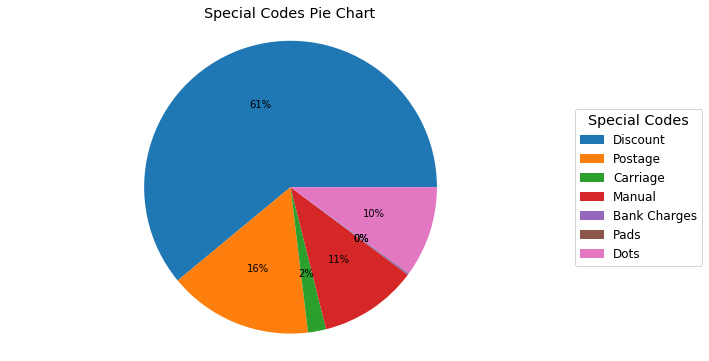

In [7]:
#summing
nb_discount = df["StockCode"].apply(lambda x:int('D' in x)).sum()
nb_post = df["StockCode"].apply(lambda x:int('POST' in x)).sum()
nb_car = df["StockCode"].apply(lambda x:int('C2' in x)).sum()
nb_man = df["StockCode"].apply(lambda x:int('M' in x)).sum()
nb_BC = df["StockCode"].apply(lambda x:int('BANK CHARGES' in x)).sum()
nb_pads = df["StockCode"].apply(lambda x:int('PADS' in x)).sum()
nb_dot = df["StockCode"].apply(lambda x:int('DOT' in x)).sum()

#presenting 
print("""The number of discounts is {}.\nThe number of postages is {}.\nThe number of carriages is {}.
The number of manual is {}.\nThe number of bank charges is {}.\nThe number of pads to match all cushions is {}
The number of dotcom postages is {}.""".format(nb_discount, nb_post, nb_car, nb_man, nb_BC, nb_pads, nb_dot))

#pie chart- code proportions
total = len(df.index)
sizes =[nb_discount, nb_post, nb_car, nb_man, nb_BC, nb_pads, nb_dot]
rest = total - sum(sizes)
labels = "Discount", "Postage", "Carriage", "Manual", "Bank Charges", "Pads", "Dots"

fig1, ax1 = plt.subplots(figsize = (10,6))
ax1.pie(sizes, autopct='%1.0f%%')
ax1.axis("equal")
legend = ax1.legend(labels,
                    title="Special Codes",
                    fontsize="large",
                    loc="center left",
                    bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(legend.get_title(),fontsize='x-large')
ax1.set_title("Special Codes Pie Chart", fontsize="x-large")

plt.show()

### 2.5 - Batch Size Summary

In [8]:
# Grouping orders amounts by customers
Order_size = df.groupby(by=["CustomerID", "InvoiceNo"], as_index=False)["TotalSale"].sum()
# Removing any empty orders
Order_size = Order_size[Order_size["TotalSale"] > 0]

# Adding date time to table
df["InvoiceDate_int"] = df["InvoiceDate"].astype(int)
temp = df.groupby(["CustomerID", "InvoiceNo"], as_index=False)["InvoiceDate_int"].mean()
df.drop("InvoiceDate_int", axis = 1, inplace = True)
Order_size.loc[:, 'Mean InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# Making order size baskets
price_range = [0, 10, 100, 500, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = Order_size[(Order_size["TotalSale"] < price) &
                       (Order_size["TotalSale"] > price_range[i-1])]["TotalSale"].count()
    count_price.append(val)

# Creating pie chart plot
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['C4', 'C1', 'C0', 'wheat']
                            
labels = [ '{}< order <{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]

ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Summary of Order Size", ha='center', fontsize = 18, color= 'white');

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [int32]